In [178]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve

In [3]:
data = pd.read_csv('customer_churn.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
for x in data.columns:
    print(x,':',data[x].unique())


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank tr

In [13]:
df1 = data.copy()

In [14]:
df1=df1.drop(columns=['customerID'], axis=1)

In [15]:
corr = df1.corr()

In [16]:
for x in df1.columns:
    print(x,':',df1[x].unique())


gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

PhoneService : ['No' 'Yes'] <br>
MultipleLines : ['No phone service' 'No' 'Yes']<br>
InternetService : ['DSL' 'Fiber optic' 'No']<br>
OnlineSecurity : ['No' 'Yes' 'No internet service']<br>
OnlineBackup : ['Yes' 'No' 'No internet service']<br>
DeviceProtection : ['No' 'Yes' 'No internet service']<br>
TechSupport : ['No' 'Yes' 'No internet service']<br>
StreamingTV : ['No' 'Yes' 'No internet service']<br>
StreamingMovies : ['No' 'Yes' 'No internet service']<br>
Contract : ['Month-to-month' 'One year' 'Two year']<br>
PaperlessBilling : ['Yes' 'No']<br>

In [17]:
df1['PhoneService'] = data['PhoneService'].apply(lambda x : 1 if x=="Yes" else 0)
df1['gender'] = data['gender'].apply(lambda x : 0 if x=="Female" else 1)

In [19]:
df1['MultipleLines'] = data['MultipleLines'].apply(condition)

In [20]:
#df1['InternetService'] = data['InternetService'].apply(condition)
df1['OnlineSecurity'] = data['OnlineSecurity'].apply(condition)
df1['OnlineBackup'] = data['OnlineBackup'].apply(condition)
df1['DeviceProtection'] = data['DeviceProtection'].apply(condition)
df1['TechSupport'] = data['TechSupport'].apply(condition)
df1['StreamingTV'] = data['StreamingTV'].apply(condition)
df1['StreamingMovies'] = data['StreamingMovies'].apply(condition)

In [21]:
df1['Partner'] = data['Partner'].apply(condition)
df1['Dependents'] = data['Dependents'].apply(condition)

In [22]:
df1['TotalCharges']= df1['TotalCharges'].apply(lambda x: 0 if x == " " else float(x))


In [55]:
df2 = pd.get_dummies(df1, columns = ['PaymentMethod', 'Contract','InternetService' ])

In [56]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No'],
      dtype='object')

In [18]:
def condition(x):
    if x=="Yes":
        return 1
#     elif x=="No internet service" or  x=="No phone service":
#         return 2
    else:
        return 0

In [25]:
df1['Churn'] = data['Churn'].apply(condition)
df1['PaperlessBilling'] = data['PaperlessBilling'].apply(condition)

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [27]:
corr = df1.corr()

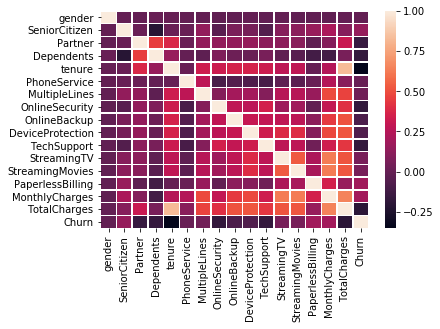

In [28]:
ax = sns.heatmap(corr, linewidth=0.5)
plt.show()

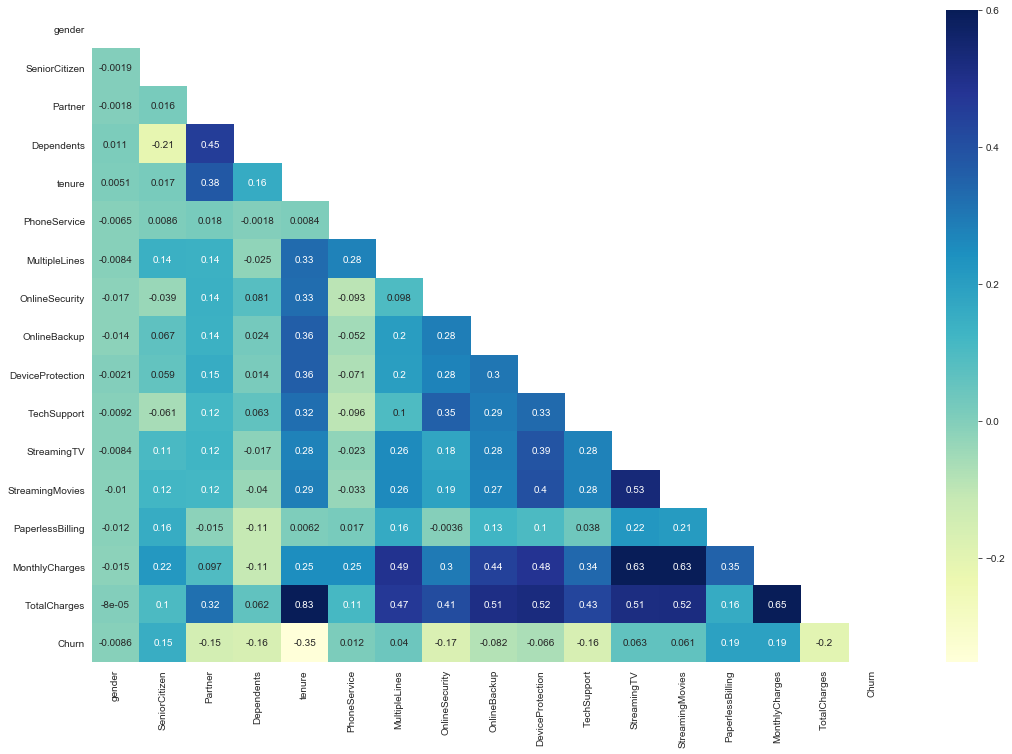

In [29]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(18,12))
    ax = sns.heatmap(corr, mask=mask, vmax=.6, square=False,  cmap="YlGnBu", annot=True)
    plt.show()

### Tenure , Tech Support, Online backup are having negative corr

In [30]:
x_churn = df1['Churn']
y_tenure = df1['tenure']

In [31]:
x_churn.sort_values(ascending=False)
y_tenure.sort_values(ascending= False)

1672    72
193     72
4553    72
483     72
3266    72
        ..
1082     0
3826     0
936      0
6754     0
1340     0
Name: tenure, Length: 7043, dtype: int64

/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


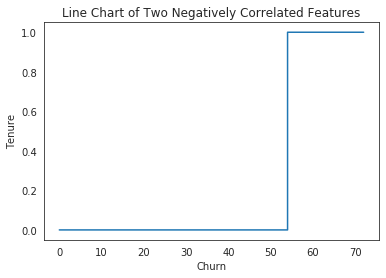

In [32]:
with sns.axes_style("white"):
    plt.xlabel("Churn")
    plt.ylabel("Tenure")
    plt.title("Line Chart of Two Negatively Correlated Features")
    plt.plot( y_tenure.sort_values(ascending= False),x_churn.sort_values(ascending=False),label="Feature 1");

In [33]:
tenure_churn_no = df1[df1.Churn==0].tenure
tenure_churn_yes = df1[df1.Churn==1].tenure


### Churn wrt to Tenure

/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/Users/siddharthpangotra/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1420: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


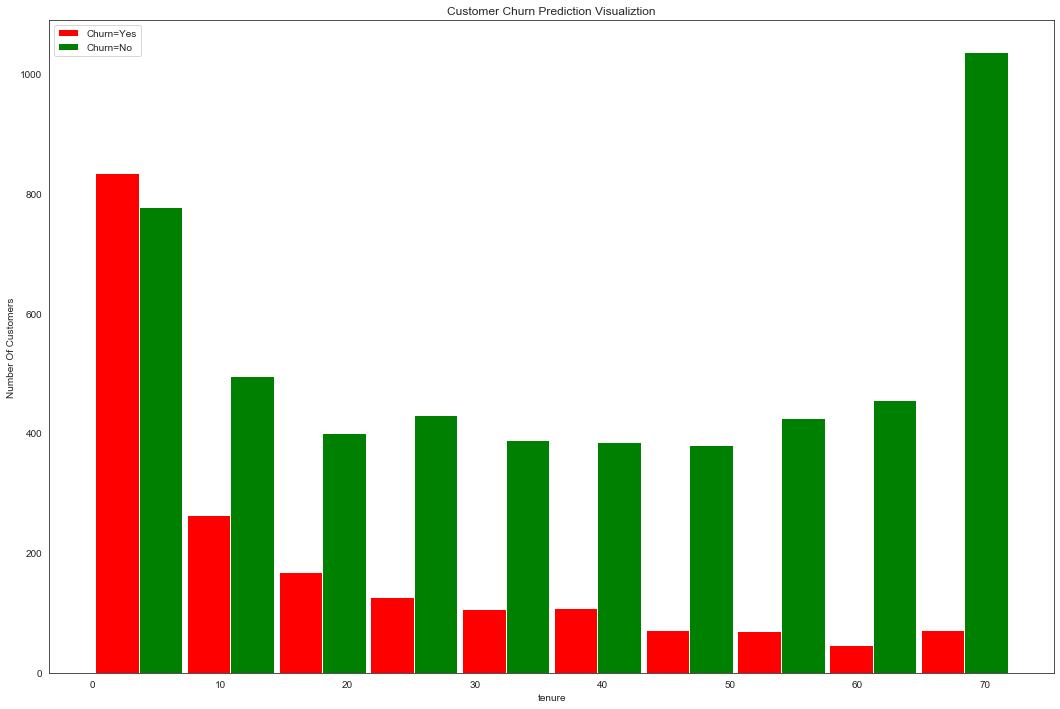

In [34]:
with sns.axes_style("white"):
   
    
    
    plt.subplots(figsize=(18,12))
    plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
    plt.legend()
    plt.xlabel("tenure")
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.show()


### Churn wrt to online Security

In [35]:
os_churn_yes = df1[df1['Churn']==1].OnlineSecurity
os_churn_no = df1[df1['Churn']==0].OnlineSecurity

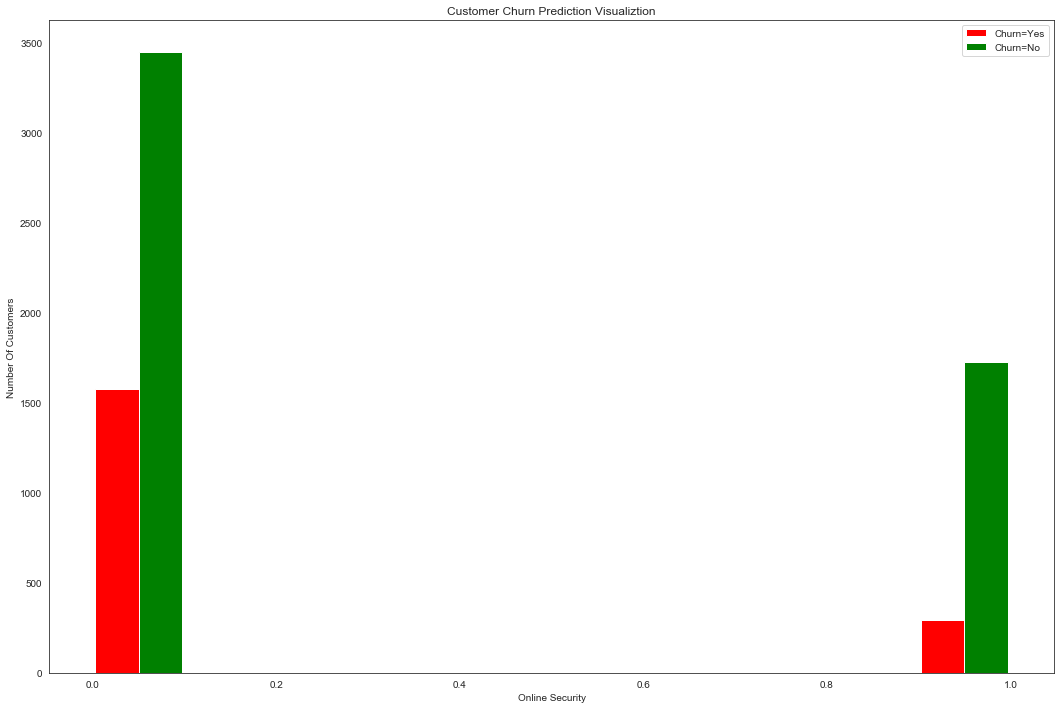

In [36]:
with sns.axes_style("white"):
   
    
    
    plt.subplots(figsize=(18,12))
    plt.hist([os_churn_yes, os_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
    plt.legend()
    plt.xlabel("Online Security")
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.show()

### Monthly charges

In [37]:
mc_churn_yes = df1[df1['Churn']==1].MonthlyCharges
mc_churn_no = df1[df1['Churn']==0].MonthlyCharges

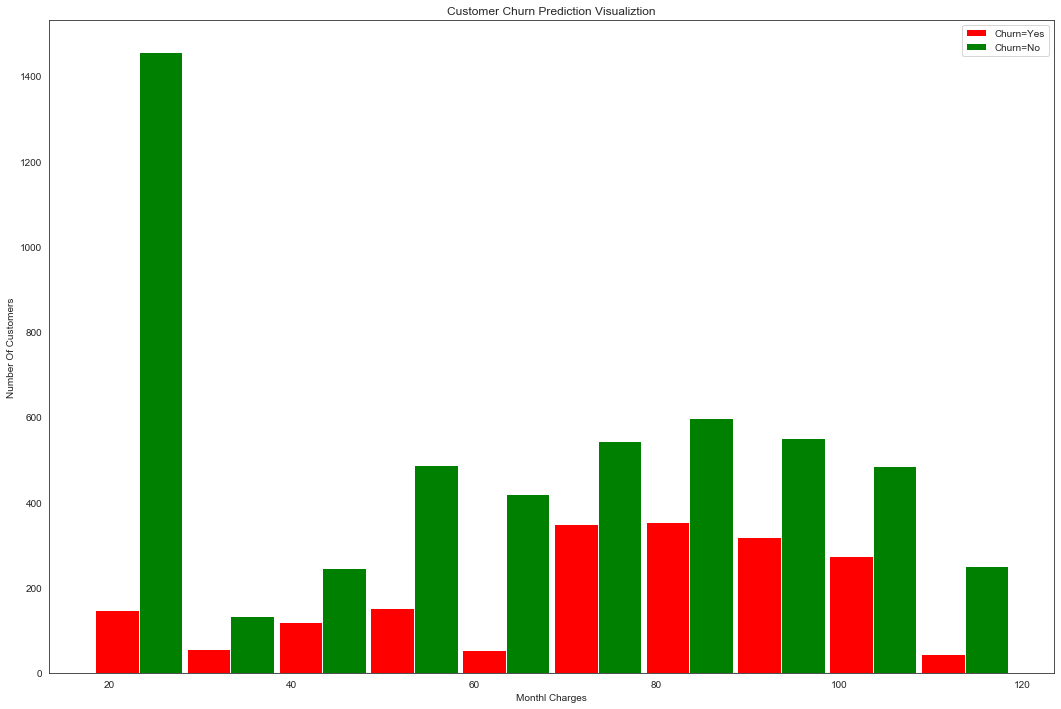

In [38]:
with sns.axes_style("white"):
   
    
    
    plt.subplots(figsize=(18,12))
    plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
    plt.legend()
    plt.xlabel("Monthl Charges")
    plt.ylabel("Number Of Customers")
    plt.title("Customer Churn Prediction Visualiztion")
    plt.show()

### Model Building

In [39]:
#df2=df1.copy()

In [58]:
Y= df1['Churn']

In [92]:
X = df2.drop(columns=[,'gender'])

In [115]:
X['gender']= df1['gender']

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7043 non-null   int64  
 1   Partner                                  7043 non-null   int64  
 2   Dependents                               7043 non-null   int64  
 3   tenure                                   7043 non-null   int64  
 4   PhoneService                             7043 non-null   int64  
 5   MultipleLines                            7043 non-null   int64  
 6   OnlineSecurity                           7043 non-null   int64  
 7   OnlineBackup                             7043 non-null   int64  
 8   DeviceProtection                         7043 non-null   int64  
 9   TechSupport                              7043 non-null   int64  
 10  StreamingTV                              7043 no

In [158]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

In [159]:
bnb = BernoulliNB()
train_op = bnb.fit(X_train,Y_train)

In [160]:
 Y_test[0:3]

1084    0
6866    1
1472    1
Name: Churn, dtype: int64

In [164]:
prediction_test= bnb.predict(X_test[0:500])

In [166]:
bnb.score(X_test,Y_test)*100

99.81069569332702

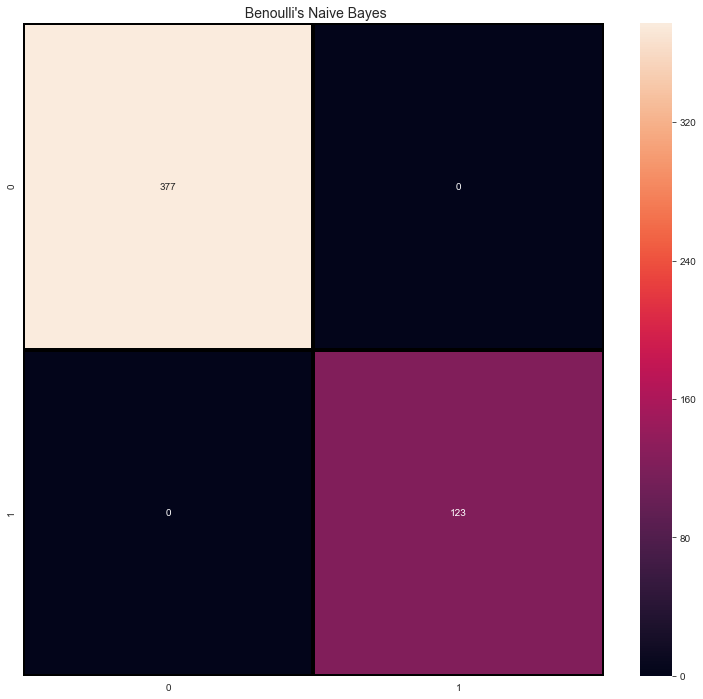

In [165]:
with sns.axes_style("white"):
    plt.figure(figsize=(13,12))
    sns.heatmap(confusion_matrix(Y_test[0:500], prediction_test),
                    annot=True,fmt = "d",linecolor="k",linewidths=3)

    plt.title(" Benoulli's Naive Bayes",fontsize=14)
    plt.show()

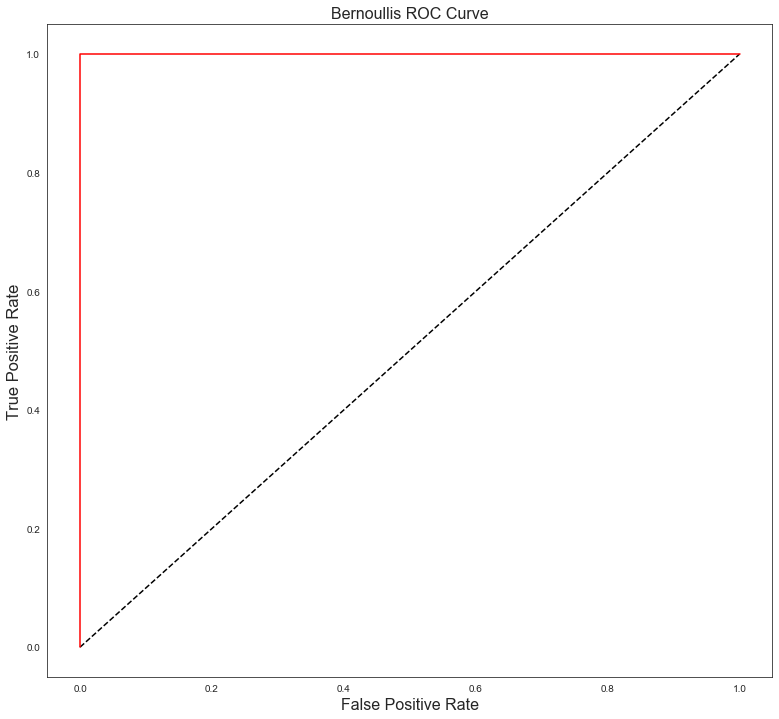

In [185]:
 with sns.axes_style("white"):   
    Y_pred_prob = bnb.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)
    plt.figure(figsize=(13,12))
    plt.plot([0, 1], [0, 1], 'k--' )
    plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16.5)
    plt.title('Bernoullis ROC Curve',fontsize=16)
    plt.show();


array([[9.99999717e-01, 2.82554963e-07],
       [2.98277268e-06, 9.99997017e-01],
       [2.75061260e-04, 9.99724939e-01],
       ...,
       [2.86337033e-04, 9.99713663e-01],
       [4.13434744e-06, 9.99995866e-01],
       [9.99988266e-01, 1.17343875e-05]])